# Week 5. Making Hierarchical Softmax

### Applied Statistics
### Sunwoo Kim

------------

#### 목차는 다음과 같습니다.  
- 0. 개요
- 1. Tree 구현
- 2. Discussion

--------

## 0. 개요

이번 과제는 Hierarchical Softmax를 활용하여 Deep Walk를 구현하는 것이었습니다.  
저는 일반적인 **Binary Tree와, Huffman Tree를** 활용한 두 가지 경우를 구현했습니다.  
제 코드가 다소 지저분(?)하기 때문에, 구현 과정을 간단하게 설명해보았습니다.

In [1]:
from IPython.display import Image

### 0.1 Binary Tree Description

일반적인 Binary Tree는 아래와 같은 특성을 갖습니다.  
만약, 노드의 수가 $num~ of~ nodes = 2^k $이 된다면, 이 Binary Tree는 Perfect Binary Tree고,   
Leaf Unit이 한 층에 모두 위치((k+1) 층)하고, 위는 2씩 나눈만큼 쌓아갑니다.  
  
반면 노드의 수가 $num~ of~ nodes \neq 2^k $라면, 문제는 조금 더 복잡해지지만, 괜찮습니다.  
가령 노드수 = 9라고 생각해보겠습니다. 그렇다면 마지막에서 두번째 층의 Tree Node 수는   
$2^{[(log_2 9)]} = 8 ~~  ; ~[] : 가우스함수$  가 될것입니다! 이를 활용해서 그림으로 보면

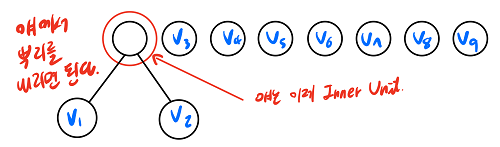

In [196]:
Image('binary_explanation.png')

이런 식으로 뿌리를 내릴 수 있겠습니다. 저는 이러한 Flow를 사용했습니다.  
1. 입력된 Node 수에 대해서 math.trunc(np.log2p(number_of_nodes))로 마지막에서 둘째층 수 확인  
2. 이때, Inner Unit의 수는 (number_of_nodes - 1)가 될 것이다.  
3. 그렇다면 마지막에서 둘째층에서 몇 개의 Inner Node가 있는가를 확인(우리 예제에서는 1개).  
4. 자연스럽게, 그 위층은 /2. 또 그 위층은 /2. 이런식으로 Inner Node의 수를 쉽게 찾을 수 있다. 
5. 이 방법으로, Inner Unit이 몇층이고, 각 층별로 몇개의 Inner Unit이 있어야 하는지 정의할 수 있다.  

구조를 구축했으니, 이제 Tree를 차례대로 쌓으면 됩니다. 저는 list를 활용했습니다.  
먼저 Leaf Node에 해당하는 값은 채우지 않고 그냥 빈 List로 둡니다.  
Inner Unit으로 [0, [], []] 인 리스트를 활용했는데, 여기서 [hidden Unit Numbering, Left Child, Right Child]가 됩니다.  
구체적인 방식은 아래와 같습니다.

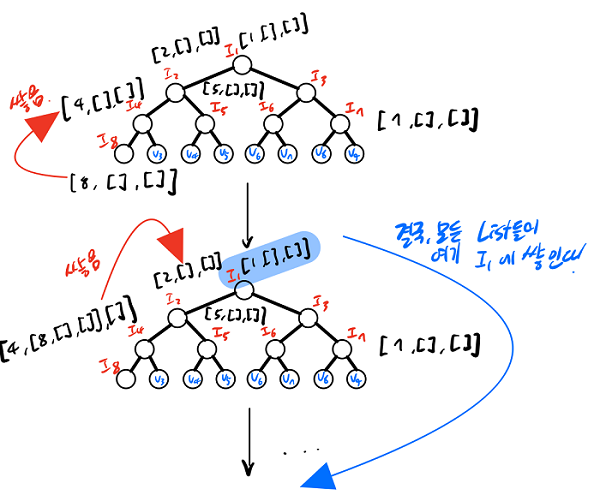

In [3]:
Image('binary_reduction.png')

이 과정을 마치면 하나의 리스트에 모든 값이 들어오게됩니다! 이제 이 리스트에서, 경로를 따라 하나 하나 내려가면서,   
비어있는 [] 에 Leaf Node들을 채워주고, 그 경로와 경로에 있는 Hidden Unit들을 Append 합니다.  
아래 그림처럼 되는것입니다!

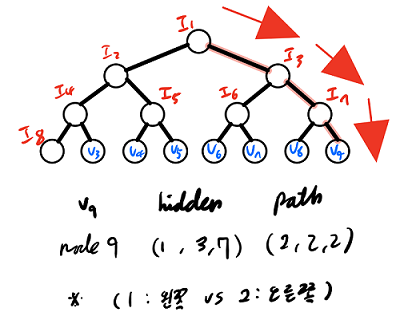

In [4]:
Image('binary_result.png')

이렇게 Target이 될 수 있는 값들로 내려가는곳에 있는 Inner(Hidden) Unit과 Path를 기록합니다.  
이 과정을 모든 Leaf Unit에 대해서 해주면, 나중에 매번 Tree를 내려가지 않아도, 그 핵심적 정보를 DataFrame에 저장해서   
매번 그 DataFrame에서 필요 정보만 추출할 수 있습니다!  
저는 이러한 방법을 사용했습니다.

#### 그 형태는 아래와 같습니다.

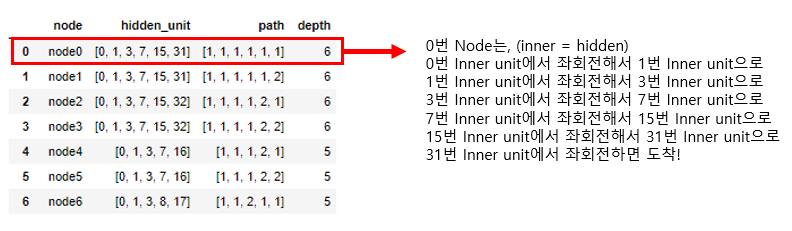

In [5]:
Image('binary_final.PNG')

-----------

### 0.2. Huffman Tree

저는 Huffman Tree를 아래 두 사이트에서 얻은 정보를 토대로 이해했습니다.

What is Huffman Encoding? : https://en.wikipedia.org/wiki/Huffman_coding  
How Can we implement it in Data? : https://www.youtube.com/watch?v=dM6us854Jk0&t=370s

전체적인 방법은 다음과 같습니다.

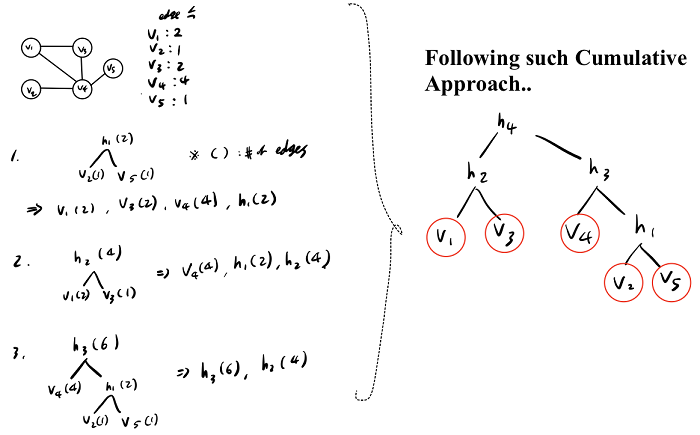

In [199]:
Image('huffman_steps.png')

저는 이를 아래와 같은 방법으로 구현했습니다.
1. 아래와 같이 Target Node별로 Edge 수 ; Node Name ; 빈 []의 array를 생성합니다.   
그리고 edge수 순으로정렬합니다.  

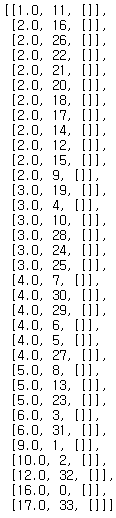

In [7]:
Image('huffman_empty_node.PNG')

2. 구체적인 방법은 아래와 같습니다.

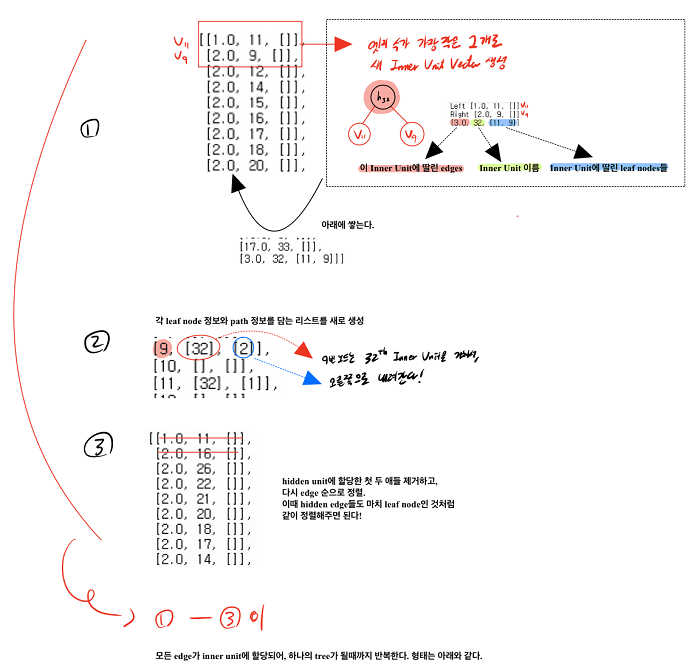

In [197]:
Image('huffman_detail.png')

위 예시는 Leaf 와 Leaf가 만날때만 다루는데, Leaf와 Inner가 만나거나, Inner와 Inner가 만나는 것은 아래와 같이 처리합니다.

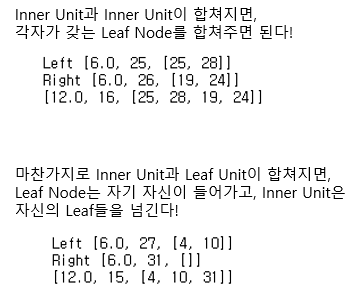

In [9]:
Image('huffman_whatif.png')

##### 최종적인 Shape는 아래와 같이 나옵니다.

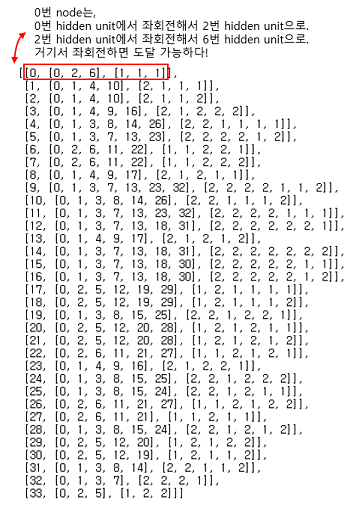

In [198]:
Image('huffman_final.PNG')

-----------

## 1. Tree 구현

In [11]:
import numpy as np
import pandas as pd
import numpy as np
import math
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import time

In [12]:
from sunwoo_hs import sunwoo_hierarchical_softamx
from sunwoo_huffman import sunwoo_huffman_hs

In [13]:
## Read Data

a = []
with open('karate_club.adjlist') as f : 
    for line in f : 
        a.append(line.rstrip().split())
a = a[3:]
adj_array = np.zeros(len(a)*len(a)).reshape(len(a), len(a))

for i1 in a : 
    for i2 in range(len(i1)) : 
        index1 = int(i1[0]) ; index2 = int(i1[i2])
        adj_array[index1, index2] = 1

adj_array = adj_array + adj_array.transpose()

for i in range(adj_array.shape[0]) : adj_array[i,i] = 0

In [14]:
## Visualizing Function

def visualize_result(model, title) : 
    
    plt.figure(figsize = (10, 10))
    plt.title(title)
    color_list = ['red', 'lime', 'cyan', 'purple']
    new_label = [0,0,1,0,2,2,2,0,3,1,2,0,0,0,3,3,2,0,3,0,3,0,3,3,1,1,3,1,1,3,3,1,3,3]
    for i in range(34) : 
        target = new_label[i]
        plt.scatter(model.h[i, 0], model.h[i, 1], color = color_list[target])
    for i, txt in enumerate(np.arange(1,35)):
        plt.annotate((i + 1), (model.h[:, 0][i], model.h[:, 1][i]), size = 15)

-----------

### 1.1. Binary Tree

In [15]:
binary_tree = sunwoo_hierarchical_softamx(adj_array)

In [16]:
## Tree를 만듭니다.
binary_tree.build_tree()

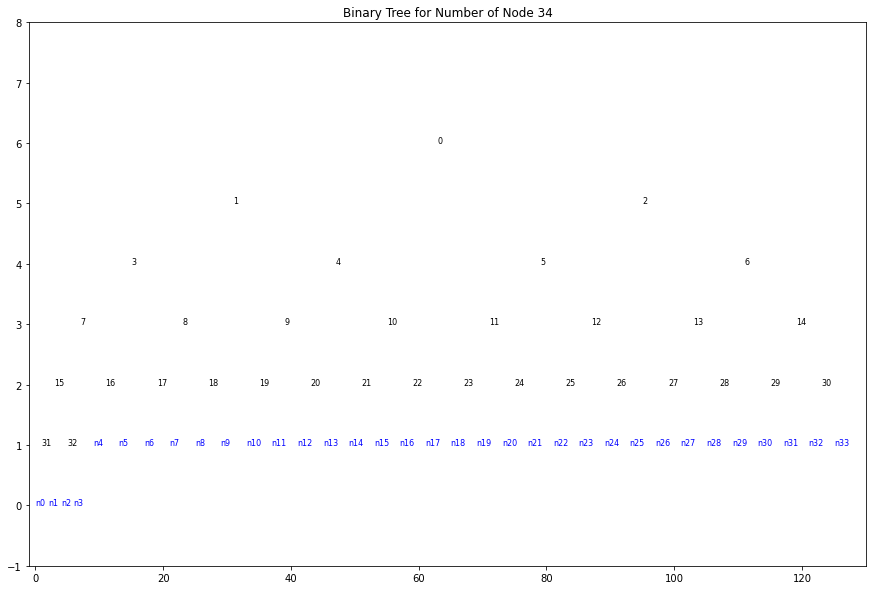

In [17]:
## 이런 형식으로 Tree가 생겼다는 것을 확인할 수 있습니다!
binary_tree.visualize_tree()

Binary Tree의 node들이 어떤 Hidden Unit과 연결되었는지 확인해보겠습니다.

In [18]:
binary_tree.node_info

,node,hidden_unit,path,depth
0,node0,"[0, 1, 3, 7, 15, 31]","[1, 1, 1, 1, 1, 1]",6
1,node1,"[0, 1, 3, 7, 15, 31]","[1, 1, 1, 1, 1, 2]",6
2,node2,"[0, 1, 3, 7, 15, 32]","[1, 1, 1, 1, 2, 1]",6
3,node3,"[0, 1, 3, 7, 15, 32]","[1, 1, 1, 1, 2, 2]",6
4,node4,"[0, 1, 3, 7, 16]","[1, 1, 1, 2, 1]",5
5,node5,"[0, 1, 3, 7, 16]","[1, 1, 1, 2, 2]",5
6,node6,"[0, 1, 3, 8, 17]","[1, 1, 2, 1, 1]",5
7,node7,"[0, 1, 3, 8, 17]","[1, 1, 2, 1, 2]",5
8,node8,"[0, 1, 3, 8, 18]","[1, 1, 2, 2, 1]",5
9,node9,"[0, 1, 3, 8, 18]","[1, 1, 2, 2, 2]",5


학습을 진행합니다!

In [192]:
binary_tree.fit(5, 0.02, 10, 3, 2, 'uniform', 0.5)

학습이 시작됩니다! Go~
Learning Finished! It took 0.4521017074584961 sec


결과는 아래와 같습니다.

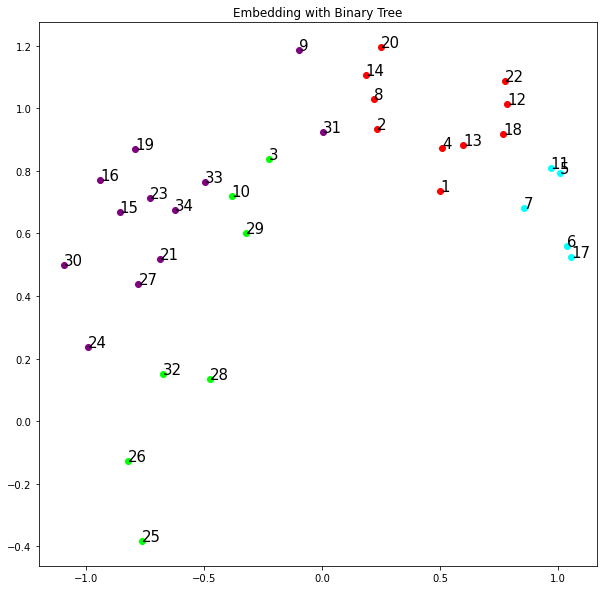

In [193]:
visualize_result(binary_tree, 'Embedding with Binary Tree')

-----------

### 1.2. Huffman Tree

In [21]:
huffman_tree = sunwoo_huffman_hs(adj_array)

In [22]:
# Tree를 만듭니다.
huffman_tree.build_tree()

어떤 Path로 Tree가 내려가고, 어떤 hidden unit이 있는지 확인해보겠습니다.

In [23]:
huffman_tree.huffman_node_info

[[0, [0, 2, 6], [1, 1, 1]],
 [1, [0, 1, 4, 10], [2, 1, 1, 1]],
 [2, [0, 1, 4, 10], [2, 1, 1, 2]],
 [3, [0, 1, 4, 9, 16], [2, 1, 2, 2, 2]],
 [4, [0, 1, 3, 8, 14, 26], [2, 2, 1, 1, 1, 1]],
 [5, [0, 1, 3, 7, 13, 23], [2, 2, 2, 2, 1, 2]],
 [6, [0, 2, 6, 11, 22], [1, 1, 2, 2, 1]],
 [7, [0, 2, 6, 11, 22], [1, 1, 2, 2, 2]],
 [8, [0, 1, 4, 9, 17], [2, 1, 2, 1, 1]],
 [9, [0, 1, 3, 7, 13, 23, 32], [2, 2, 2, 2, 1, 1, 2]],
 [10, [0, 1, 3, 8, 14, 26], [2, 2, 1, 1, 1, 2]],
 [11, [0, 1, 3, 7, 13, 23, 32], [2, 2, 2, 2, 1, 1, 1]],
 [12, [0, 1, 3, 7, 13, 18, 31], [2, 2, 2, 2, 2, 2, 1]],
 [13, [0, 1, 4, 9, 17], [2, 1, 2, 1, 2]],
 [14, [0, 1, 3, 7, 13, 18, 31], [2, 2, 2, 2, 2, 2, 2]],
 [15, [0, 1, 3, 7, 13, 18, 30], [2, 2, 2, 2, 2, 1, 1]],
 [16, [0, 1, 3, 7, 13, 18, 30], [2, 2, 2, 2, 2, 1, 2]],
 [17, [0, 2, 5, 12, 19, 29], [1, 2, 1, 1, 1, 1]],
 [18, [0, 2, 5, 12, 19, 29], [1, 2, 1, 1, 1, 2]],
 [19, [0, 1, 3, 8, 15, 25], [2, 2, 1, 2, 2, 1]],
 [20, [0, 2, 5, 12, 20, 28], [1, 2, 1, 2, 1, 1]],
 [21, [0, 2, 5,

Huffman Tree는 구조가 정해져있지 않기때문에 제 재량으로는 Tree를 그릴 수 없었습니다..   
바로 학습을 진행하겠습니다.

In [92]:
huffman_tree.fit(6, 0.02, 10, 3, 2, 'uniform', 0.2)

학습이 시작됩니다! Go~
Learning Finished! It took 0.23105096817016602 sec


결과는 아래와 같습니다.

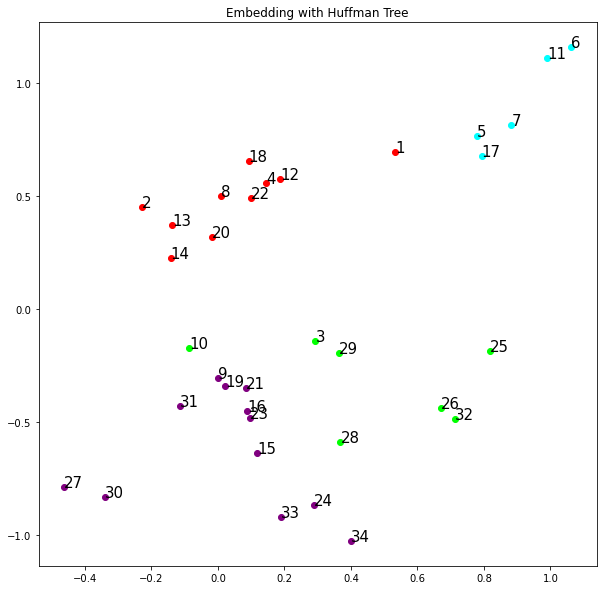

In [93]:
visualize_result(huffman_tree, 'Embedding with Huffman Tree')

-----------

## 2. Discussion

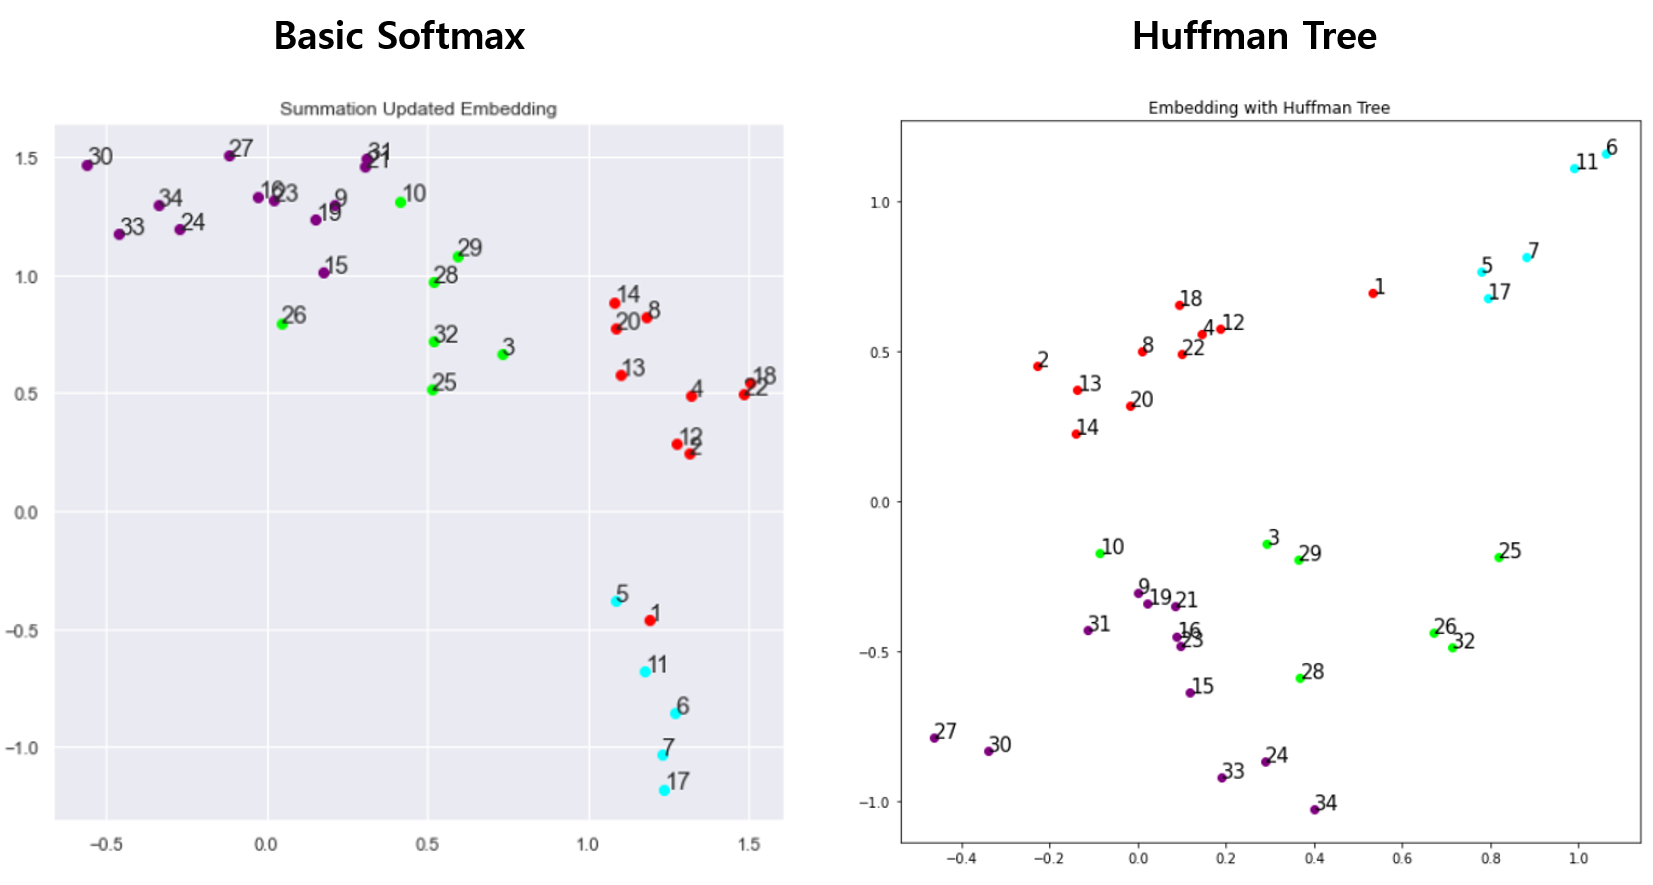

In [194]:
Image('comparison.png')

결과를 비교하면 아래와 같습니다.

- 데이터가 작아, 연산 속도가 둘 모두 1초 이하였기때문에 이 예제에서는 computation적인 이점은 없었음
- 전체적인 임베딩 결과는 큰 차이는 없었음
- 애매한 위치에 있었던 1번 노드와 10번 노드는 이번에도 군집간 애매한 위치에 위치함

아래는 반복시행을 통해 얻은 제 개인적인 견해입니다.

- Huffman Tree가 일반 Binary Tree보다 더 Cluster가 명확하게 나뉘었음
- 반복시행시 Huffman Tree가 더 일관성있는 결과를 보임
- 반복시행시 일반 Softmax가 Tree 구조보다 더 일관성있는 결과를 보였음

제 코드를 보시면, 일반 Binary Tree가 시간이 좀 오래걸리신 것을 확인할 수 있는데,   
(일반 Softmax & Huffman Tree = 0.2초 내 / 일반 Binary = 0.4초)  
그 이유는 일반 Binary Tree가 Data Frame을 생성하여 Path를 시각화한 후, 다시 values를   
추출하는 과정에서 시간이 소요된 것 같습니다.  